Natalia Velasco García A01638047
# K-means clustering
# Importing libraries

In [181]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Importing data

In [182]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url, names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"])

# Undertanding and preprocessing the data

In [183]:
print(dataset.shape)

dataset.head()

(150, 5)


SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [184]:
dataset = dataset .dropna()

print(dataset.shape)

(150, 5)


In [185]:
# Encoding the categorical column
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
#dataset["NewClass"] = df.Class.replace({"Iris-setosa":1, "Iris-versicolor": 2, "Iris-virginica":3})
#Visualize the dataset
dataset

SepalLength  SepalWidth  PetalLength  PetalWidth  Class
0            5.1         3.5          1.4         0.2      0
1            4.9         3.0          1.4         0.2      0
2            4.7         3.2          1.3         0.2      0
3            4.6         3.1          1.5         0.2      0
4            5.0         3.6          1.4         0.2      0
..           ...         ...          ...         ...    ...
145          6.7         3.0          5.2         2.3      2
146          6.3         2.5          5.0         1.9      2
147          6.5         3.0          5.2         2.0      2
148          6.2         3.4          5.4         2.3      2
149          5.9         3.0          5.1         1.8      2

[150 rows x 5 columns]

In [186]:
dataset.drop(["SepalLength", "SepalWidth"], axis='columns', inplace=True)
dataset

PetalLength  PetalWidth  Class
0            1.4         0.2      0
1            1.4         0.2      0
2            1.3         0.2      0
3            1.5         0.2      0
4            1.4         0.2      0
..           ...         ...    ...
145          5.2         2.3      2
146          5.0         1.9      2
147          5.2         2.0      2
148          5.4         2.3      2
149          5.1         1.8      2

[150 rows x 3 columns]

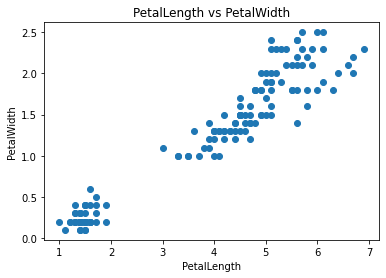

In [187]:
plt.scatter(dataset.PetalLength,dataset.PetalWidth)
plt.title('PetalLength vs PetalWidth')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.show()

<ipython-input-188-61425f04cbe7>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Class 0')
<ipython-input-188-61425f04cbe7>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Class 1')
<ipython-input-188-61425f04cbe7>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalLength, df3.PetalWidth, Label='Class 2')


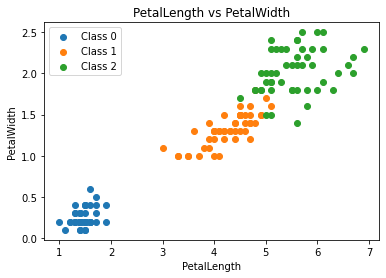

In [188]:
df1 = dataset[dataset.Class==0]
df2 = dataset[dataset.Class==1]
df3 = dataset[dataset.Class==2]

plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Class 0')
plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Class 1')
plt.scatter(df3.PetalLength, df3.PetalWidth, Label='Class 2')


plt.title('PetalLength vs PetalWidth')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()

# Kmeans clustering

In [189]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['PetalLength','PetalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [190]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

dataset

PetalLength  PetalWidth  Class  Cluster1
0            1.4         0.2      0         1
1            1.4         0.2      0         1
2            1.3         0.2      0         1
3            1.5         0.2      0         1
4            1.4         0.2      0         1
..           ...         ...    ...       ...
145          5.2         2.3      2         2
146          5.0         1.9      2         2
147          5.2         2.0      2         2
148          5.4         2.3      2         2
149          5.1         1.8      2         2

[150 rows x 4 columns]

In [191]:
dataset.Cluster1.unique()

array([1, 0, 2])

In [192]:
# ...
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

# Plot estimated clusters

<ipython-input-193-751b693cb274>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Estimated Class 0')
<ipython-input-193-751b693cb274>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Estimated Class 1')
<ipython-input-193-751b693cb274>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalLength, df3.PetalWidth, Label='Estimated Class 2')


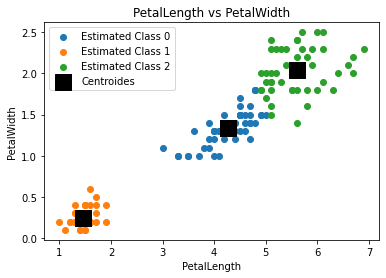

In [193]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Estimated Class 0')
plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Estimated Class 1')
plt.scatter(df3.PetalLength, df3.PetalWidth, Label='Estimated Class 2')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='s', label='Centroides', s=256)

plt.title('PetalLength vs PetalWidth')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()

# Selecting K: elbow plot

In [194]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['PetalLength','PetalWidth']])
    sse.append(km.inertia_)

C:\Users\natal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


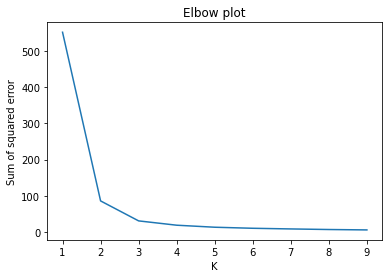

In [195]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

# Normalizing the data: preprocessing using min max scaler

In [196]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['PetalLength']])
dataset['PetalLength'] = scaler.transform(dataset[['PetalLength']])

scaler.fit(dataset[['PetalWidth']])
dataset['PetalWidth'] = scaler.transform(dataset[['PetalWidth']])

dataset

PetalLength  PetalWidth  Class  Cluster1
0       0.067797    0.041667      0         1
1       0.067797    0.041667      0         1
2       0.050847    0.041667      0         1
3       0.084746    0.041667      0         1
4       0.067797    0.041667      0         1
..           ...         ...    ...       ...
145     0.711864    0.916667      2         2
146     0.677966    0.750000      2         2
147     0.711864    0.791667      2         2
148     0.745763    0.916667      2         2
149     0.694915    0.708333      2         2

[150 rows x 4 columns]

In [197]:
dataset.describe()

PetalLength  PetalWidth       Class    Cluster1
count   150.000000  150.000000  150.000000  150.000000
mean      0.467458    0.458056    1.000000    0.973333
std       0.299203    0.317599    0.819232    0.818795
min       0.000000    0.000000    0.000000    0.000000
25%       0.101695    0.083333    0.000000    0.000000
50%       0.567797    0.500000    1.000000    1.000000
75%       0.694915    0.708333    2.000000    2.000000
max       1.000000    1.000000    2.000000    2.000000

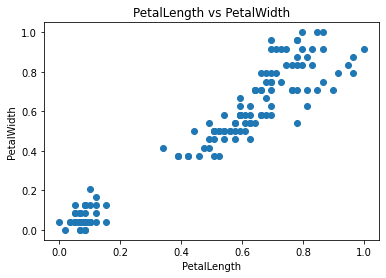

In [198]:
plt.scatter(dataset.PetalLength,dataset.PetalWidth)
plt.title('PetalLength vs PetalWidth')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.show()

In [199]:
# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['PetalLength','PetalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [201]:
# Add a new column to the dataset with the cluster information
dataset['Cluster2'] = yp

dataset

PetalLength  PetalWidth  Class  Cluster1  Cluster2
0       0.067797    0.041667      0         1         1
1       0.067797    0.041667      0         1         1
2       0.050847    0.041667      0         1         1
3       0.084746    0.041667      0         1         1
4       0.067797    0.041667      0         1         1
..           ...         ...    ...       ...       ...
145     0.711864    0.916667      2         2         0
146     0.677966    0.750000      2         2         0
147     0.711864    0.791667      2         2         0
148     0.745763    0.916667      2         2         0
149     0.694915    0.708333      2         2         0

[150 rows x 5 columns]

<ipython-input-202-48850c93f068>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Estimated Class 0')
<ipython-input-202-48850c93f068>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Estimated Class 1')
<ipython-input-202-48850c93f068>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalLength, df3.PetalWidth, Label='Estimated Class 2')


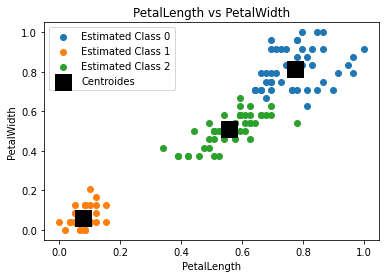

In [202]:
df1 = dataset[dataset.Cluster2==0]
df2 = dataset[dataset.Cluster2==1]
df3 = dataset[dataset.Cluster2==2]

plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Estimated Class 0')
plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Estimated Class 1')
plt.scatter(df3.PetalLength, df3.PetalWidth, Label='Estimated Class 2')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='s', label='Centroides', s=256)

plt.title('PetalLength vs PetalWidth')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()

# Activity: work with the iris dataset
1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.


### 2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.

In [81]:
dataset = pd.read_csv(url, names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"])
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset.drop(["PetalLength", "PetalWidth"], axis='columns', inplace=True)

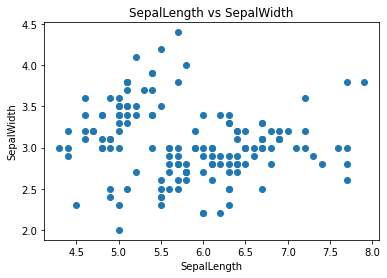

In [82]:
plt.scatter(dataset.SepalLength,dataset.SepalWidth)
plt.title('SepalLength vs SepalWidth')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

<ipython-input-57-8969caf53b18>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Class 0')
<ipython-input-57-8969caf53b18>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Class 1')
<ipython-input-57-8969caf53b18>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Class 2')


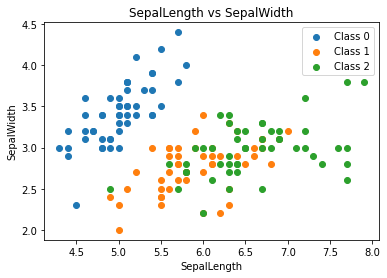

In [57]:
df1 = dataset[dataset.Class==0]
df2 = dataset[dataset.Class==1]
df3 = dataset[dataset.Class==2]

plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Class 0')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Class 1')
plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Class 2')


plt.title('SepalLength vs SepalWidth')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

C:\Users\natal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


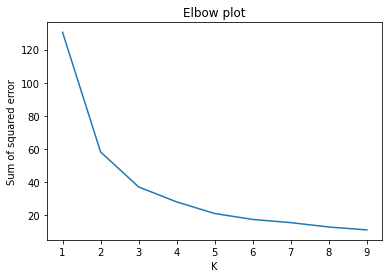

In [83]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['SepalLength','SepalWidth']])
    sse.append(km.inertia_)
    
plt.plot(k_rng,sse)
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [84]:
# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['SepalLength','SepalWidth']])
dataset['Cluster1'] = yp

<ipython-input-85-f377e6400312>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Estimated Class 0')
<ipython-input-85-f377e6400312>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Estimated Class 1')
<ipython-input-85-f377e6400312>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Estimated Class 2')


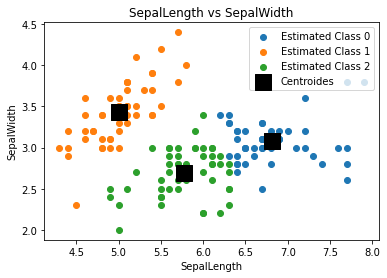

In [85]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Estimated Class 0')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Estimated Class 1')
plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Estimated Class 2')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='s', label='Centroides', s=256)

plt.title('SepalLength vs SepalWidth')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

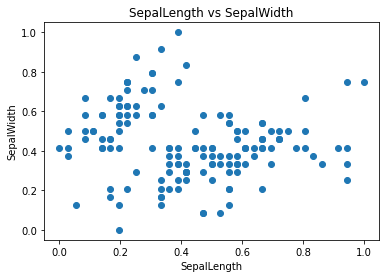

In [86]:
scaler = MinMaxScaler()

scaler.fit(dataset[['SepalLength']])
dataset['SepalLength'] = scaler.transform(dataset[['SepalLength']])

scaler.fit(dataset[['SepalWidth']])
dataset['SepalWidth'] = scaler.transform(dataset[['SepalWidth']])

plt.scatter(dataset.SepalLength,dataset.SepalWidth)
plt.title('SepalLength vs SepalWidth')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

In [180]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(dataset[['SepalLength','SepalWidth']])
dataset['Cluster2'] = yp
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<ipython-input-88-f377e6400312>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Estimated Class 0')
<ipython-input-88-f377e6400312>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Estimated Class 1')
<ipython-input-88-f377e6400312>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Estimated Class 2')


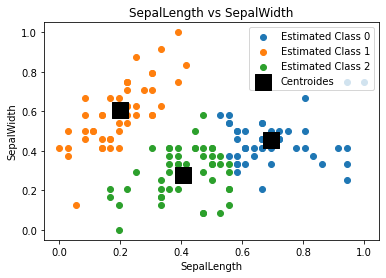

In [88]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Estimated Class 0')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Estimated Class 1')
plt.scatter(df3.SepalLength, df3.SepalWidth, Label='Estimated Class 2')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='s', label='Centroides', s=256)

plt.title('SepalLength vs SepalWidth')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

### 3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible

In [167]:
dataset = pd.read_csv(url, names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"])
dataset = dataset .dropna()
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset

SepalLength  SepalWidth  PetalLength  PetalWidth  Class
0            5.1         3.5          1.4         0.2      0
1            4.9         3.0          1.4         0.2      0
2            4.7         3.2          1.3         0.2      0
3            4.6         3.1          1.5         0.2      0
4            5.0         3.6          1.4         0.2      0
..           ...         ...          ...         ...    ...
145          6.7         3.0          5.2         2.3      2
146          6.3         2.5          5.0         1.9      2
147          6.5         3.0          5.2         2.0      2
148          6.2         3.4          5.4         2.3      2
149          5.9         3.0          5.1         1.8      2

[150 rows x 5 columns]

C:\Users\natal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


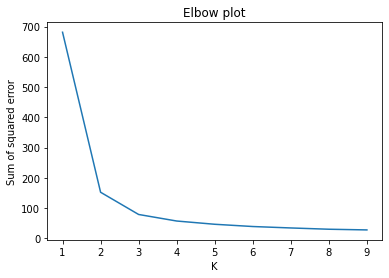

In [168]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]])
    sse.append(km.inertia_)
    
plt.plot(k_rng,sse)
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [169]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(dataset[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]])
dataset['Cluster1'] = yp
print(dataset.Cluster1.unique())
yp

[1 2 0]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [170]:
scaler = MinMaxScaler()

scaler.fit(dataset[['SepalLength']])
dataset['SepalLength'] = scaler.transform(dataset[['SepalLength']])

scaler.fit(dataset[['SepalWidth']])
dataset['SepalWidth'] = scaler.transform(dataset[['SepalWidth']])

scaler.fit(dataset[['PetalLength']])
dataset['PetalLength'] = scaler.transform(dataset[['PetalLength']])

scaler.fit(dataset[['PetalWidth']])
dataset['PetalWidth'] = scaler.transform(dataset[['PetalWidth']])

dataset

SepalLength  SepalWidth  PetalLength  PetalWidth  Class  Cluster1
0       0.222222    0.625000     0.067797    0.041667      0         1
1       0.166667    0.416667     0.067797    0.041667      0         1
2       0.111111    0.500000     0.050847    0.041667      0         1
3       0.083333    0.458333     0.084746    0.041667      0         1
4       0.194444    0.666667     0.067797    0.041667      0         1
..           ...         ...          ...         ...    ...       ...
145     0.666667    0.416667     0.711864    0.916667      2         0
146     0.555556    0.208333     0.677966    0.750000      2         2
147     0.611111    0.416667     0.711864    0.791667      2         0
148     0.527778    0.583333     0.745763    0.916667      2         0
149     0.444444    0.416667     0.694915    0.708333      2         2

[150 rows x 6 columns]

In [171]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(dataset[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]])
dataset['Cluster2'] = yp
print(dataset.Cluster1.unique())
yp

[1 2 0]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [179]:
dataset

SepalLength  SepalWidth  PetalLength  PetalWidth  Class  Cluster1  \
0       0.222222    0.625000     0.067797    0.041667      0         1   
1       0.166667    0.416667     0.067797    0.041667      0         1   
2       0.111111    0.500000     0.050847    0.041667      0         1   
3       0.083333    0.458333     0.084746    0.041667      0         1   
4       0.194444    0.666667     0.067797    0.041667      0         1   
..           ...         ...          ...         ...    ...       ...   
145     0.666667    0.416667     0.711864    0.916667      2         0   
146     0.555556    0.208333     0.677966    0.750000      2         2   
147     0.611111    0.416667     0.711864    0.791667      2         0   
148     0.527778    0.583333     0.745763    0.916667      2         0   
149     0.444444    0.416667     0.694915    0.708333      2         2   

     Cluster2  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
145         2  
146         0  
147         2  
148         2  
149         0  

[150 rows x 7 columns]

### Draw conclusiones

- About the scalling: does it helps or not?

Pétalos: quedó mas precisa.

Sépalos: menos precisa.

Pétalos y sépalos: ambos resultados quedaron muy parecidos.

- About the elbow plot: does the K agree with the real number of clusters?

Si en los tres análisis hechos coincidio con tres clusters.

- Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?

La mejor comparación es la de solo los pétalos, ya que esa la comparación fue la que obtuvo el resultado más parecido a la columna Class del dataset, esto es porque los puntos estan distribuidos con límites claros entre cada cluster a diferencia de la comparación de los sépalos que no tienen límites claros entre clusters, ya que las observaciones pertenecientes a cierta clase de flor estan dispersas.
